In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
#多子图
def muti_axes(mode):
    import matplotlib.pyplot as plt
    if mode == 0:
        plt = plt.figure()
        ax1 = plt.subplots()
        ax1.spines["right"].set_color("none")
        ax1.spines["left"].set_color("none")
        ax1.spines["top"].set_color("none")
        ax1.spines["bottom"].set_color("none")
        return ax1
    elif mode != 0:
        # 不能加 plt = plt.figure()
        ax2 = plt.subplot(3,3,mode)
        ax2.spines["right"].set_color("none")
        ax2.spines["left"].set_color("none")
        ax2.spines["top"].set_color("none")
        ax2.spines["bottom"].set_color("none")
        return ax2


In [47]:

#看一下df1中feature和energy的关系
file_path = './results-2021-12-18.csv'
df = pd.read_csv(file_path)
# print(type(df))
df1 = df[(df["algorithm"] == 'SVM')&(df["RQ"]==2.2) ]
row_labels = df1.index[:]
col_labels = df1.columns[[5,8]]
df1.loc[row_labels,col_labels]



,no_features,train_energy(J)
2,4084,0.530155
10,8169,0.412243
29,6535,0.485354
50,3268,0.319910
63,817,0.292157
...,...,...
3543,8169,0.413254
3565,1633,0.513829
3577,1633,0.275112
3585,5718,0.371999


<class 'matplotlib.axes._subplots.AxesSubplot'>


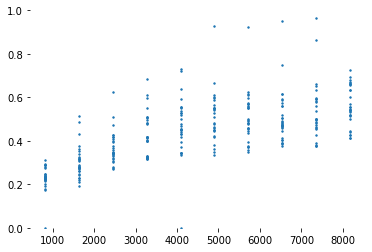

In [48]:
#df1中特征数和消耗的关系
row_labels = df1.index[:]
col_feature_labels = df1.columns[5]
col_energy_labels = df1.columns[8]
x = df1.loc[row_labels,col_feature_labels].to_numpy()
y = df1.loc[row_labels,col_energy_labels].to_numpy()

def req2(ax,x,y):
    
    ax = muti_axes(ax)
    ax.set_ylim(0,1)
    ax.scatter(x,y,s=2)
    print(type(ax))

req2(0,x,y)


<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


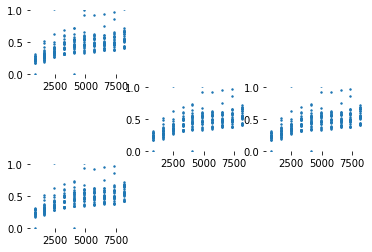

In [65]:
#test muti_axes
row_labels = df1.index[:]
col_feature_labels = df1.columns[5]
col_energy_labels = df1.columns[8]
x = df1.loc[row_labels,col_feature_labels].to_numpy()
y = df1.loc[row_labels,col_energy_labels].to_numpy()

def req2(ax,x,y):
    
    ax = muti_axes(ax)
    print(type(ax))
    ax.set_ylim(0,1)
    ax.scatter(x,y,s=2)

req2(1,x,y)
req2(7,x,y)
req2(5,x,y)
req2(6,x,y)

以下是方便编程的数据，可自行添加

In [66]:
df.index
df.columns



Index(['algorithm', 'RQ', 'experiment_id', 'iteration', 'no_datapoints',
       'no_features', 'preprocessing_energy(J)', 'preprocessing_time(s)',
       'train_energy(J)', 'train_time(s)', 'predict_energy(J)',
       'predict_time(s)', 'datatype', 'accuracy', 'precision', 'recall', 'f1'],
      dtype='object')

In [67]:
df[(df["algorithm"]=="SVM") & (df["iteration"]>=28)&(df["RQ"]==2.2)]

,algorithm,RQ,experiment_id,iteration,no_datapoints,no_features,preprocessing_energy(J),preprocessing_time(s),train_energy(J),train_time(s),predict_energy(J),predict_time(s),datatype,accuracy,precision,recall,f1
103,SVM,2.2,19,28,3900,7352,0.024838,1.454158,1.082703,2.002613,0.256295,1.708449,float64,0.828349,0.431965,0.892857,0.582242
118,SVM,2.2,17,29,3900,5718,0.026062,1.439394,0.483663,1.988805,0.174060,1.692302,float64,0.828349,0.431965,0.892857,0.582242
534,SVM,2.2,16,29,3900,4901,0.015688,1.469871,0.336492,1.975564,0.252027,1.677228,float64,0.828349,0.431965,0.892857,0.582242
617,SVM,2.2,20,28,3900,8169,0.000859,1.456562,0.520931,2.082650,0.224279,1.722895,float64,0.828349,0.431965,0.892857,0.582242
807,SVM,2.2,18,28,3900,6535,0.016627,1.458878,0.387707,2.023417,0.221461,1.671066,float64,0.828349,0.431965,0.892857,0.582242
839,SVM,2.2,16,28,3900,4901,0.024725,1.458850,1.011099,1.988535,0.262286,1.686947,float64,0.828349,0.431965,0.892857,0.582242
1118,SVM,2.2,14,29,3900,3268,0.024948,1.460711,0.415544,1.947036,0.163896,1.653218,float64,0.828349,0.431965,0.892857,0.582242
1228,SVM,2.2,13,28,3900,2451,0.024278,1.461577,0.474540,1.843517,0.239157,1.632652,float64,0.828349,0.431965,0.892857,0.582242
1414,SVM,2.2,15,28,3900,4084,0.016274,1.471527,0.478652,1.956450,0.200332,1.678299,float64,0.828349,0.431965,0.892857,0.582242
1469,SVM,2.2,20,29,3900,8169,0.000865,1.439507,0.601252,2.073545,0.233926,1.727123,float64,0.828349,0.431965,0.892857,0.582242


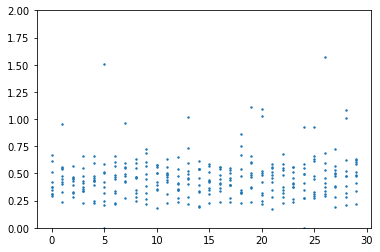

In [68]:
#探索迭代次数和消耗的关系
plt.ylim(0,2)
row_labels = df1.index[:]
col_iteration_labels = df1.columns[3]
col_energy_labels = df1.columns[8]
x = df1.loc[row_labels,col_iteration_labels].to_numpy()
#坐标轴
y = df1.loc[row_labels,col_energy_labels].to_numpy()
plt.scatter(x,y,s=2)
